<a href="https://colab.research.google.com/github/DanetteGarrido/AI.cpp/blob/main/Project2_DG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("student_dropout_data.csv", sep=';')

In [ ]:
target_counts = df['Target'].value_counts()

target_counts

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


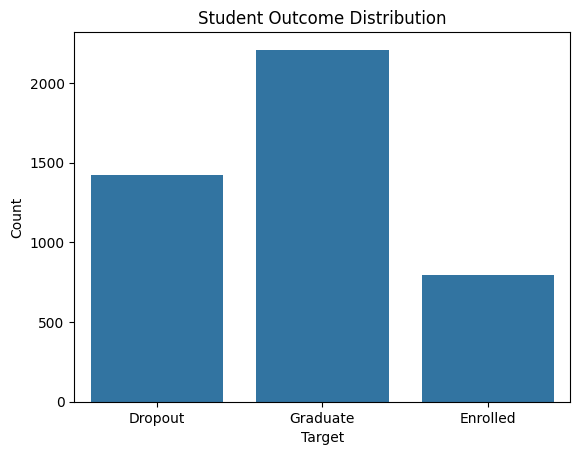

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution for the target variable
sns.countplot(x='Target', data=df)
plt.title("Student Outcome Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


In [ ]:
df['Graduate_bin'] = (df['Target'] == 'Graduate').astype(int)
df['Dropout_bin'] = (df['Target'] == 'Dropout').astype(int)
df['Enrolled_bin'] = (df['Target'] == 'Enrolled').astype(int)

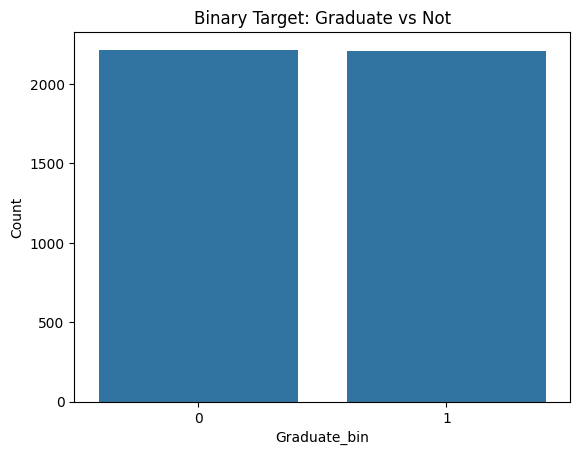

In [ ]:
sns.countplot(x='Graduate_bin', data=df)
plt.title("Binary Target: Graduate vs Not")
plt.xlabel("Graduate_bin")
plt.ylabel("Count")
plt.show()

In [ ]:
from statsmodels.formula.api import logit

model_grad = logit('Graduate_bin ~ Q("Tuition fees up to date") + Q("Admission grade") + Q("Age at enrollment")', data=df).fit()

print("Graduate vs Not:")
print(model_grad.summary())

Optimization terminated successfully.
         Current function value: 0.611693
         Iterations 7
Graduate vs Not:
                           Logit Regression Results                           
Dep. Variable:           Graduate_bin   No. Observations:                 4424
Model:                          Logit   Df Residuals:                     4420
Method:                           MLE   Df Model:                            3
Date:                Wed, 26 Mar 2025   Pseudo R-squ.:                  0.1175
Time:                        14:29:42   Log-Likelihood:                -2706.1
converged:                       True   LL-Null:                       -3066.5
Covariance Type:            nonrobust   LLR p-value:                6.808e-156
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -3.8679      0.370    -

In [ ]:
model_drop = logit('Dropout_bin ~ Q("Tuition fees up to date") + Q("Admission grade") + Q("Age at enrollment")', data=df).fit()
print("\nDropout vs Not:")
print(model_drop.summary())


Optimization terminated successfully.
         Current function value: 0.517993
         Iterations 6

Dropout vs Not:
                           Logit Regression Results                           
Dep. Variable:            Dropout_bin   No. Observations:                 4424
Model:                          Logit   Df Residuals:                     4420
Method:                           MLE   Df Model:                            3
Date:                Wed, 26 Mar 2025   Pseudo R-squ.:                  0.1749
Time:                        14:29:48   Log-Likelihood:                -2291.6
converged:                       True   LL-Null:                       -2777.3
Covariance Type:            nonrobust   LLR p-value:                2.980e-210
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        2.0015      0.366     

In [ ]:
model_enroll = logit('Enrolled_bin ~ Q("Tuition fees up to date") + Q("Admission grade") + Q("Age at enrollment")', data=df).fit()
print("\nEnrolled vs Not:")
print(model_enroll.summary())

Optimization terminated successfully.
         Current function value: 0.462846
         Iterations 6

Enrolled vs Not:
                           Logit Regression Results                           
Dep. Variable:           Enrolled_bin   No. Observations:                 4424
Model:                          Logit   Df Residuals:                     4420
Method:                           MLE   Df Model:                            3
Date:                Wed, 26 Mar 2025   Pseudo R-squ.:                 0.01647
Time:                        14:30:06   Log-Likelihood:                -2047.6
converged:                       True   LL-Null:                       -2081.9
Covariance Type:            nonrobust   LLR p-value:                 8.588e-15
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.7518      0.423    

Findings:


In [ ]:
X = df[["Tuition fees up to date", "Admission grade", "Age at enrollment"]]
y = df['Target']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
clf = LogisticRegression(max_iter=3000, class_weight='balanced')
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = 0.8, # This is the proportion of the dataset to include in the train split.
    random_state = 16, # This is set to control the shuffling applied to the data before spliting it. It helps to make the work reproducible
)


clf.fit(X_train, y_train)
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)



Coefficients: [[-1.79529766 -0.00585039  0.03911541]
 [ 0.3183644  -0.00524609 -0.00943018]
 [ 1.47693327  0.01109648 -0.02968523]]
Intercept: [ 1.38574077  0.68479606 -2.07053683]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = clf.predict(X_test)
print("\\nClassification Report (Scikit-learn):")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

\nClassification Report (Scikit-learn):
              precision    recall  f1-score   support

     Dropout       0.65      0.46      0.54       288
    Enrolled       0.25      0.39      0.30       161
    Graduate       0.63      0.63      0.63       436

    accuracy                           0.53       885
   macro avg       0.51      0.49      0.49       885
weighted avg       0.57      0.53      0.54       885

Confusion Matrix:
[[132  73  83]
 [ 22  62  77]
 [ 49 112 275]]
Accuracy Score: 0.5299435028248588


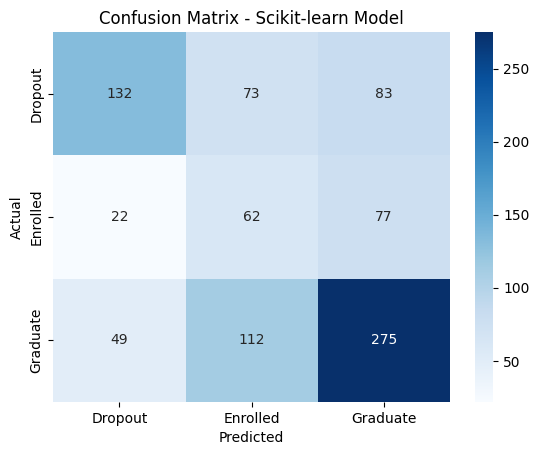

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=['Dropout', 'Enrolled', 'Graduate'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dropout', 'Enrolled', 'Graduate'],
            yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.title("Confusion Matrix - Scikit-learn Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
cm = confusion_matrix(y_test, y_pred) # actual value is our y_test
cm

array([[132,  73,  83],
       [ 22,  62,  77],
       [ 49, 112, 275]])